In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [2]:
%pwd

'd:\\Eng\\DATA\\mchine learning Andrew Ng\\Linear-Regression-with-GD'

### `Load Dataset`

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
x_train = df.drop(['Unnamed: 0', 'sales'], axis=1)
y_train = df['sales']

In [22]:
x_train.shape, y_train.shape

((200, 3), (200,))

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train[:5]

array([[ 0.96985227,  0.98152247,  1.77894547],
       [-1.19737623,  1.08280781,  0.66957876],
       [-1.51615499,  1.52846331,  1.78354865],
       [ 0.05204968,  1.21785493,  1.28640506],
       [ 0.3941822 , -0.84161366,  1.28180188]])

### *Gradient Descent*
>`Predict function:` $f(w,b) = wx +b$<br>
>`Cost function:` $J(w,b) = 1/2m * sum(f(w,b) - y)^2$<br>
>`Update method:` Gradient Descent $w := w - alpha * gradient$, $b := b - alpha * gradient$

1. inizialize parameters
2. predict
3. compute cost
4. compute gradient
5. update

In [7]:
#initialize the bias and the weight
b = 0
#b = 3.89124375
w = np.zeros(x_train.shape[1])
#w = np.array([1.12449158, 0.81770539, 0.30063205])

In [8]:
def predict(w, b, x_train):
    return np.dot(x_train,w) + b
fwb = predict(w, b, x_train)
fwb[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
def get_cost(y, y_hat):
    error = y - y_hat
    return (1/(2*y.shape[0])) * np.sum(error**2)
get_cost(y_train, fwb)

111.858125

In [11]:
def update_parameters(x,y,y_hat,b,w,learning_rate):
    db = (1/x.shape[0]) * np.sum(y_hat - y)
    dw = (1/x.shape[0]) * np.dot((y_hat-y),x)
    b = b - learning_rate*db
    w = w - learning_rate*dw
    return b,w
update_parameters(x_train,y_train,y_hat=fwb,b=b,w=w,learning_rate=0.15)         

(2.103375, array([0.61065092, 0.44983362, 0.1782238 ]))

In [12]:
def gradient_descent(x,y,alpha,num_iterations):
    w = np.zeros(x.shape[1])
    b = 0
    iters = []
    costs = []
    for i in range(num_iterations):
        fwb = predict(w, b, x)
        cost = get_cost(y, fwb)
        prev_b=b
        prev_w=w
        b,w = update_parameters(x, y, fwb, prev_b, prev_w, alpha)
        if(i%10 == 0):
            iters.append(i)
            costs.append(cost)
    return iters, costs, b, w


In [13]:
iter, cost, b, w = gradient_descent(x_train,y_train,0.01,1000)
b, w

(14.021894631183178, array([ 3.91907052,  2.78991399, -0.02034046]))

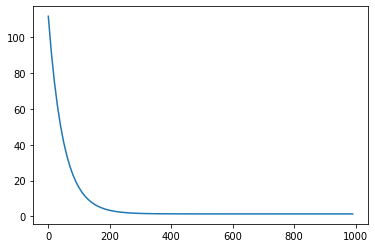

In [14]:
plt.plot(iter, cost)
plt.show()

In [15]:
sdg = SGDRegressor(eta0=0.01)
sdg.fit(x_train, y_train)
sdg.intercept_, sdg.coef_

(array([14.01179395]), array([ 3.91343294,  2.78387488, -0.00680581]))

In [16]:
y_sdg = sdg.predict(x_train)
mean_squared_error(y_train, y_sdg)

2.7844929960756106

In [17]:
y_my = predict(w, b, x_train)
mean_squared_error(y_train, y_my)

2.7841328159853798